## Projeto 1 - Trans cal 

Luiza Coutinho /
Daniel Marco /
Gabriel Buhrer /
Fernando Koelle


Sistema par

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math 

# Carregar os dados a partir da linha correta (linha 40)
df_data_corrected = pd.read_excel('dados.xlsx', sheet_name='Planilha1', header=39)

# Coluna de tempo e colunas de temperatura
time_column = 'Scan Sweep Time (Sec)'
temperature_columns = [f'{i} (°C)' for i in range(101, 117)]

# Converter a coluna de tempo para considerar apenas as horas e agrupar os dados por hora
df_data_corrected['Hour'] = pd.to_datetime(df_data_corrected[time_column], errors='coerce').dt.hour

# Calcular a média simples das temperaturas para cada hora
df_grouped = df_data_corrected.groupby('Hour').mean()

# Plotar o gráfico com as médias horárias das temperaturas
plt.figure(figsize=(12, 8))

for temp_col in temperature_columns:
    plt.plot(df_grouped.index, df_grouped[temp_col], label=temp_col)

# Adicionar título e rótulos aos eixos
plt.title('Temperaturas Médias por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Temperaturas')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'pandas'

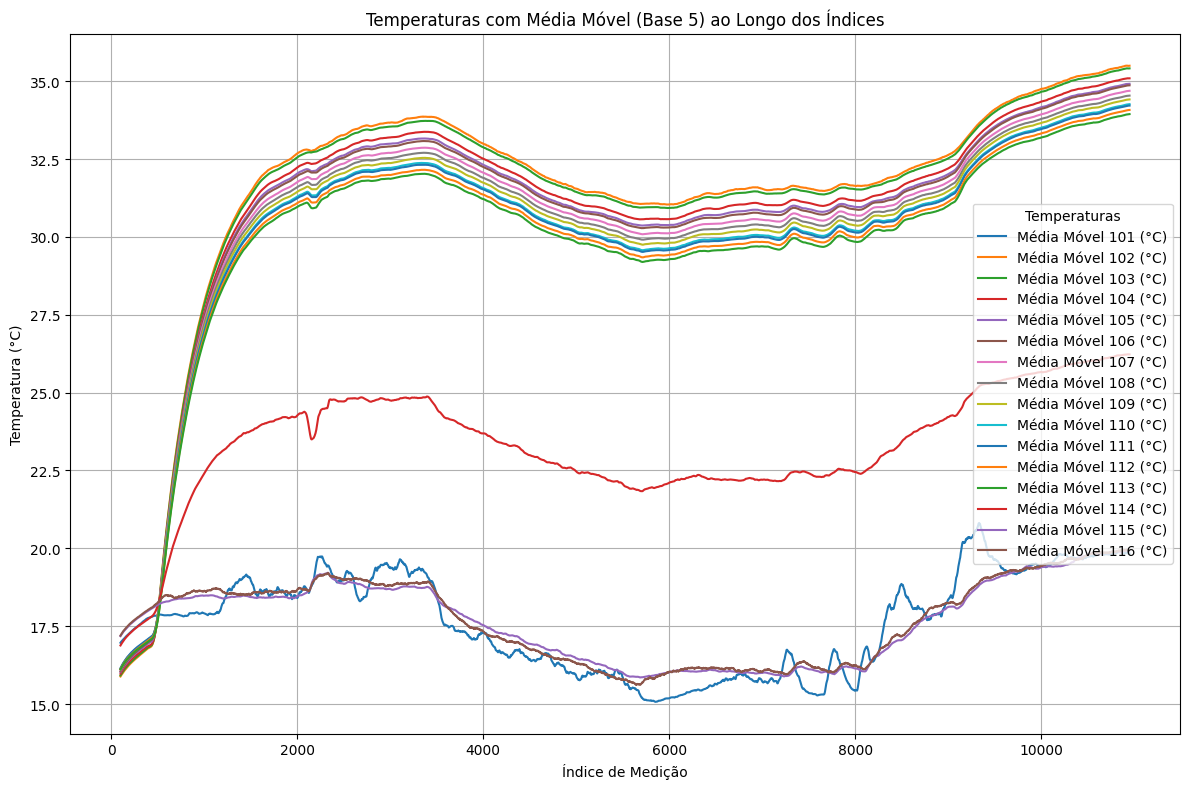

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados a partir da linha correta (linha 40)
df_data_corrected = pd.read_excel('dados.xlsx', sheet_name='Planilha1', header=39)

# Colunas de temperatura que iremos usar
temperature_columns = [f'{i} (°C)' for i in range(101, 117)]

# Criar uma coluna de índices de 1 até o tamanho das medições de temperatura
df_data_corrected['Index'] = range(1, len(df_data_corrected) + 1)

# Aplicar a média móvel com base 5 em cada coluna de temperatura
df_data_corrected_moving_avg = df_data_corrected.copy()
for temp_col in temperature_columns:
    df_data_corrected_moving_avg[temp_col] = df_data_corrected[temp_col].rolling(window=100).mean()

# Plotar o gráfico com os índices e a média móvel
plt.figure(figsize=(12, 8))

for temp_col in temperature_columns:
    plt.plot(df_data_corrected_moving_avg['Index'], df_data_corrected_moving_avg[temp_col], label=f'Média Móvel {temp_col}')

# Adicionar título e rótulos aos eixos
plt.title('Temperaturas com Média Móvel (Base 5) ao Longo dos Índices')
plt.xlabel('Índice de Medição')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Temperaturas')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


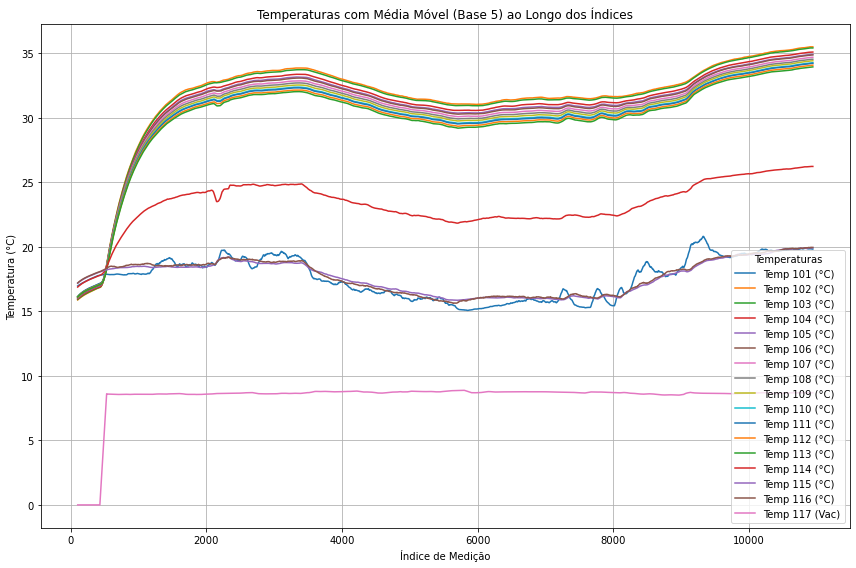

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados a partir da linha correta (linha 40)
df_data_corrected = pd.read_excel('dados.xlsx', sheet_name='Planilha1', header=39)

# Colunas de temperatura que iremos usar, incluindo "117 (Vac)"
temperature_columns = [f'{i} (°C)' for i in range(101, 117)]
temperature_columns.append('117 (Vac)')  # Adicionar a coluna "117 (Vac)"

# Criar uma coluna de índices de 1 até o tamanho das medições de temperatura
df_data_corrected['Index'] = range(1, len(df_data_corrected) + 1)

# Aplicar a média móvel com base 5 em cada coluna de temperatura
df_data_corrected_moving_avg = df_data_corrected.copy()
for temp_col in temperature_columns:
    df_data_corrected_moving_avg[temp_col] = df_data_corrected[temp_col].rolling(window=100).mean()

# Plotar o gráfico com os índices e a média móvel
plt.figure(figsize=(12, 8))

for temp_col in temperature_columns:
    plt.plot(df_data_corrected_moving_avg['Index'], df_data_corrected_moving_avg[temp_col], label=f'Temp {temp_col}')

# Adicionar título e rótulos aos eixos
plt.title('Temperaturas com Média Móvel (Base 5) ao Longo dos Índices')
plt.xlabel('Índice de Medição')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Temperaturas')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


# Exercício 1


| Propriedade               | Valor   |
|---------------------------|---------|
| Número do sistema          | 2       |
| Resistência elétrica (Ω)   | 6,5     |
| Tensão Aplicada (V)        | 100     |


# Exercicio 2

Achando equação da reta para realizar a interpolação e descobrir k_t da nossa Temperatura de filme 

Calculando médias gerais de cada ponto da aleta

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('dados.xlsx', sheet_name='Planilha1', header=39)


start_row = 5364
end_row = 7543

coluna_t_amb = ['101 (°C)']
coluna_t_base = ['102 (°C)']
colunas_desejadas = [f"{i} (°C)" for i in range(102, 113)]

# Calcular as médias das colunas entre as linhas 5365 e 7543
media_t_amb =df.loc[start_row:end_row, coluna_t_amb].mean()
media_t_base =df.loc[start_row:end_row, coluna_t_base].mean()
medias_aleta = df.loc[start_row:end_row, colunas_desejadas].mean().tolist()

# Exibir a lista de médias
# print(len(medias_aleta))
print(media_t_amb)
print(media_t_base)
# print (medias_aleta)

101 (°C)    15.61163
dtype: float64
102 (°C)    31.350312
dtype: float64


Fazendo tf a partir das médias

In [43]:
media_total =pd.Series(medias_aleta).mean()

Tf= (media_total+media_t_amb)/2
print (media_total)
# print(media_t_amb)
# print(Tf)

30.43713269391158


Descobrindo k a partir de tf

In [37]:
a = (156.88 - 155.68) / (51.67 - 37.38)

def acha_t(T):
    k_t = a*T - a*37.78 + 155.68
    return k_t


K_tf = acha_t(Tf)
#print (K_tf)

# Exercício 3


### A) 

In [38]:
# Exercicio 4 


a = (156.88 - 155.68) / (51.67 - 37.38)

def acha_t(T):
    k_t = a*T - a*37.78 + 155.68
    return k_t

def distribuicao(m, l, h, x,Temp):
    dist = (math.cosh(m*(l - x)) + (h/m*acha_t(Temp)) * math.sin(m*(l - x))) / (math.cosh(m*l) + (h/m*acha_t(Temp) * math.sinh(m*l)))




